## Gradient Ascent

1. Start with the weight all set to 1
2. Repeat R number of times:
    1. Calculate the gradient of the entire dataset
    2. Update the weight vectors by alpha * gradient
    3. Return the weight vectors

In [86]:
%matplotlib inline

import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [2]:
def sigmoid_i(z):
    import math
    return 1.0 / (1 + math.exp(-z))

(0.5, 0.6224593312018546, 0.7310585786300049)

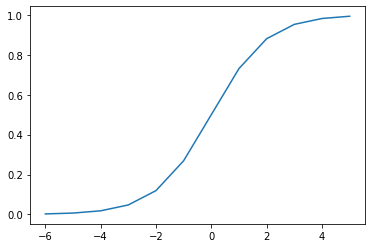

In [3]:
X = range(-6, 6, 1)
y = [sigmoid_i(x) for x in X]
plt.plot(X, y)

sigmoid_i(0), sigmoid_i(0.5), sigmoid_i(1)

In [4]:
X, y = [], []
with open('data/testSet.txt', 'r') as f:
    for line in f.readlines():
        row = line.strip().split()
        X.append([1, 
                  float(row[0]), 
                  float(row[1])])
        y.append(int(row[2]))
X, y = np.array(X), np.array(y)

In [5]:
X.shape, X[0]

((100, 3), array([ 1.      , -0.017612, 14.053064]))

In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [28]:
def gradient_ascent(X, y, alpha=0.001, epoch=500):
    m, n = X.shape
    theta = np.ones(n) 
    
    for i in range(epoch):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h - y)
        theta -= alpha * gradient
    return theta

In [29]:
theta = gradient_ascent(X, y)
theta

array([ 4.12414349,  0.48007329, -0.6168482 ])

In [35]:
# Plot best fit.
def plot_best_fit(X, y, theta):
    for y_i in np.unique(y):
        X_y = X[y == y_i]
        plt.scatter(X_y[:, 1], 
                    X_y[:, 2],
                    label=y_i)
    plt.legend()

    # Plot the line.
    x = range(-3, 3, 1)
    plt.plot(x, [(-theta[0] - theta[1] * i) / theta[2]  for i in x])

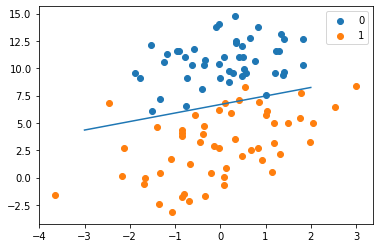

In [36]:
plot_best_fit(X, y, theta)

## Stochastic Gradient Ascent

1. Start with weights all set to 1.
2. For each piece of data in the dataset:
    1. Calculate the gradient of one piece of data.
    2. Update the weights vector by alpha * gradient.
    3. Return the weights vector.

In [31]:
def stochastic_gradient_ascent(X, y, alpha=0.01):
    m, n = X.shape
    theta = np.ones(n)
    
    for i in range(m):
        h = sigmoid(sum(X[i] * theta))
        theta += alpha * (y[i] - h) * X[i]
    return theta

In [37]:
theta = stochastic_gradient_ascent(X, y)
theta

array([ 1.01702007,  0.85914348, -0.36579921])

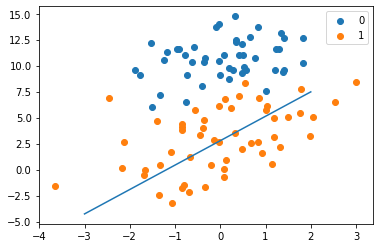

In [38]:
plot_best_fit(X, y, theta)

In [47]:
def stochastic_gradient_descent_improved(X, y, epochs=150):
    m, n = X.shape
    theta = np.ones(n)
    
    for j in range(epochs):
        indices = list(range(m))
        
        for i in range(m):
            # Alpha changes with each iteration.
            alpha = 4 / (1 + i + j) + 0.01
            
            rand_idx = int(random.uniform(0, len(indices)))
            h = sigmoid(sum(X[rand_idx] * theta))
            theta += alpha * (y[rand_idx] - h) * X[rand_idx]
            del(indices[rand_idx])
    return theta

In [48]:
theta = stochastic_gradient_descent_improved(X, y)
theta

array([14.51300725,  1.05145558, -2.04204058])

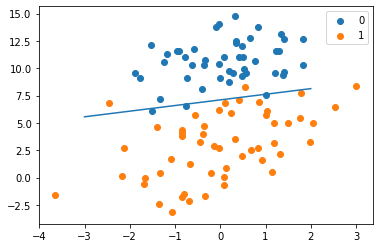

In [49]:
plot_best_fit(X, y, theta)

In [90]:
clf = SGDRegressor(max_iter=1000, 
                   shuffle=True, 
                   random_state=42, 
                   tol=1e-3,
                   alpha=0.01)
clf.fit(X, y)
clf.coef_, clf.intercept_, clf.n_iter_

(array([ 0.54697406,  0.07579644, -0.0975598 ]), array([0.54716663]), 26)

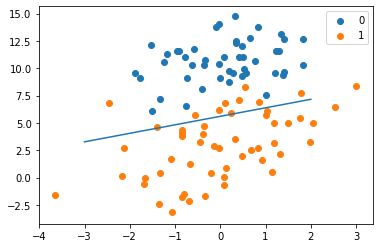

In [91]:
plot_best_fit(X, y, clf.coef_)